In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn3

import seaborn as sns
sns.set()
%matplotlib inline
pd.options.mode.chained_assignment = None

In [3]:
# user inputs:
SEED = 13
np.random.seed(SEED)
KEEP_ROWS_FRAC = 1.0 # set to 1 if all rows are meant to be kept
skiprows_func = lambda i: i>0 and np.random.rand() > KEEP_ROWS_FRAC

In [4]:
periods_aggregate = pd.read_csv('data/periods_aggregate_features.csv', skiprows=skiprows_func)

In [5]:
all_samples = pd.read_csv('data/all_samples_no_nulls.csv', 
                          usecols=['item_id', 'activation_date', 'city', 'region',
                              'parent_category_name', 'category_name', 
                             'item_seq_number', 'user_type', 'price_norm'], skiprows=skiprows_func)

In [132]:
used_cols = ['item_id', 'user_id', 'activation_date']

train = pd.read_csv('data/train.csv', usecols=used_cols+['deal_probability'],
                parse_dates=['activation_date'], infer_datetime_format=True)
train_active = pd.read_csv('data/train_active.csv', usecols=used_cols)
test = pd.read_csv('data/test.csv', usecols=used_cols)
test_active = pd.read_csv('data/test_active.csv', usecols=used_cols)

train_periods = pd.read_csv('data/periods_train.csv', parse_dates=['date_from', 'date_to'])
test_periods = pd.read_csv('data/periods_test.csv', parse_dates=['date_from', 'date_to'])

In [7]:
train_periods.iloc[:2]

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18


In [76]:
periods_aggregate.columns

Index(['user_id', 'days_to_publish', 'days_online',
       'activation_date_isholiday', 'activation_date_wday',
       'activation_date_yday', 'date_from_isholiday', 'date_from_wday',
       'date_from_yday', 'date_to_isholiday', 'date_to_wday', 'date_to_yday',
       'nlisted', 'sum_days_online', 'mean_days_online', 'last_days_online',
       'sum_days_to_publish', 'mean_days_to_publish',
       'median_date_to_isholiday', 'median_date_to_wday',
       'median_date_to_yday', 'start_date_isholiday', 'start_date_wday',
       'start_date_yday', 'end_date_isholiday', 'end_date_wday',
       'end_date_yday', 'nitems'],
      dtype='object')

In [9]:
set_train_active = set(train_active['item_id'])
set_train_periods = set(train_periods['item_id'])
set_test_active = set(test_active['item_id'])
set_test_periods = set(train_periods['item_id'])
set_train = set(train['item_id'])
set_test = set(test['item_id'])

In [10]:
def empty_text_func(x):
    return ''
fontdict = {'fontsize': 17,
           'color': 'w',
           'backgroundcolor': 'k',
           'weight': 'bold',
           'style': 'italic'}

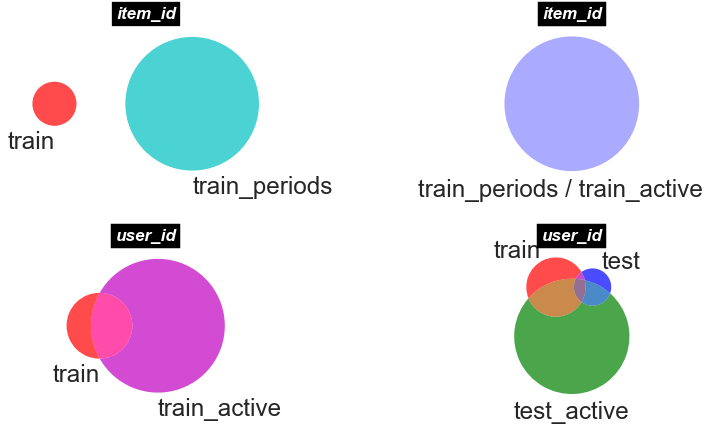

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
plt.subplots_adjust(hspace=0.4)
colors = {'train': 'r', 'test': 'b', 'train_active': 'm', 'train_periods': 'c', 'test_active': 'g'}
axes[0, 0].set_title('item_id', fontdict=fontdict)
# sns.reset_orig()
# sns.reset_defaults()
import seaborn as sns
sns.set_context("poster", font_scale=1.05)
v1 = venn2([set_train, set_train_periods], subset_label_formatter=empty_text_func,
     set_labels= ['train', 'train_periods'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train'], colors['train_periods']), ax=axes[0, 0]);

axes[0, 1].set_title('item_id', fontdict=fontdict)
v2 = venn2([set_train_periods, set_train_active], subset_label_formatter=empty_text_func,
     set_labels= ['train_periods /', ' train_active'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train_periods'], colors['train_active']), ax=axes[0, 1]);

axes[1, 0].set_title('user_id', fontdict=fontdict)
v3 = venn2([set(train['user_id']), set(train_active['user_id'])], subset_label_formatter=empty_text_func,
     set_labels= ['train', 'train_active'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train'], colors['train_active']), ax=axes[1, 0]);

axes[1, 1].set_title('user_id', fontdict=fontdict)
v4 = venn3([set(train['user_id']), set(test['user_id']), set(test_active['user_id'])], subset_label_formatter=empty_text_func,
     set_labels= ['train', 'test', 'test_active'], normalize_to=1.0, alpha=0.7,
      set_colors=(colors['train'], colors['test'], colors['test_active']), ax=axes[1, 1]);

In [91]:
df = train.merge(periods_aggregate, how='left', on='user_id')

In [92]:
df = df.dropna()

In [93]:
# ea.get_feature_importance(sort=True)
# OrderedDict([('activation_date_yday', 0.4039770787665535),
#              ('nlisted', 0.0916081753479928),
#              ('activation_date_isholiday', 0.055421559939924925),
#              ('median_date_to_yday', 0.05439734989943655),
#              ('sum_days_online', 0.0493175445719399),

In [94]:
df['activation_date_yday'] = df['activation_date_yday'].apply(round).astype(int)

In [95]:
df.columns

Index(['item_id', 'user_id', 'activation_date', 'deal_probability',
       'days_to_publish', 'days_online', 'activation_date_isholiday',
       'activation_date_wday', 'activation_date_yday', 'date_from_isholiday',
       'date_from_wday', 'date_from_yday', 'date_to_isholiday', 'date_to_wday',
       'date_to_yday', 'nlisted', 'sum_days_online', 'mean_days_online',
       'last_days_online', 'sum_days_to_publish', 'mean_days_to_publish',
       'median_date_to_isholiday', 'median_date_to_wday',
       'median_date_to_yday', 'start_date_isholiday', 'start_date_wday',
       'start_date_yday', 'end_date_isholiday', 'end_date_wday',
       'end_date_yday', 'nitems'],
      dtype='object')

In [96]:
df = df.sort_values(by='activation_date_yday')

In [97]:
#  Category price box plots
# df.plot(kind='scatter', x='activation_date_yday', y='deal_probability')
mean_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday')['deal_probability'].mean().reset_index()
min_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday')['deal_probability'].min().reset_index()
max_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday')['deal_probability'].max().reset_index()
median_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday')['deal_probability'].median().reset_index()
third_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday')['deal_probability'].quantile(0.75).reset_index()
first_act = df[['activation_date_yday', 'deal_probability']].groupby('activation_date_yday')['deal_probability'].quantile(0.25).reset_index()

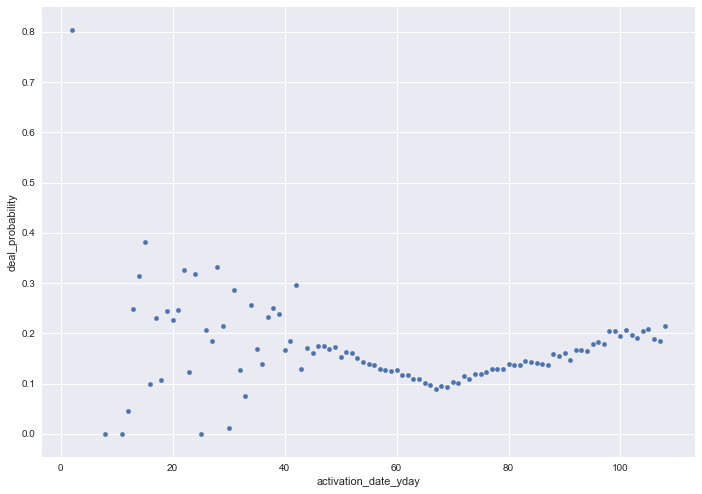

In [98]:
mean_act.plot(kind='scatter', x='activation_date_yday', y='deal_probability');
# third_act.plot(kind='scatter', x='activation_date_yday', y='deal_probability');

In [99]:
x = mean_act['activation_date_yday']

In [100]:
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, plot

BACKGROUND = 'rgb(230, 230, 230)'
COLORSCALE = [[0, "rgb(244,236,21)"], [0.3, "rgb(249,210,41)"], [0.4, "rgb(134,191,118)"],
              [0.5, "rgb(37,180,167)"], [0.65, "rgb(17,123,215)"], [1, "rgb(54,50,153)"]]
FONT = 'Times New Roman'
AX_LSIZE = 30
TICK_S = 24
L_M = 30 + AX_LSIZE + TICK_S
R_M = 30 + AX_LSIZE
T_M = 30
B_M = 20 + AX_LSIZE + TICK_S
MARGINS = {'l': L_M, 'b': B_M, 't': T_M, 'r': R_M}
Y_TITLE = 'test y title'
t = []
t.append(go.Scatter(x=x.values,y=min_act['deal_probability'].values,mode='lines',opacity=0.7,line={'color': 'red', 'width': 3},name='Minimum'))
t.append(go.Scatter(x=x,y=first_act['deal_probability'].values,mode = 'lines',opacity = 0.7,marker = {'size': 5,'line': {'width': 0.5, 'color': '444'}},line = {'color': 'black', 'width': 0.0},showlegend=False,name = '25th percentile'))
t.append(go.Scatter(x=x,y=median_act['deal_probability'].values ,mode='lines',opacity=0.7,marker={'size': 5, 'line': {'width': 0.5, 'color': 'white'}},line={'color': 'black', 'width': 3},fillcolor = 'rgba(68, 68, 68, 0.3)',fill = 'tonexty',name='Median'))
t.append(go.Scatter(x=x,y=third_act['deal_probability'].values ,mode = 'lines',opacity = 0.7,marker = {'size': 5, 'line': {'width': 0.5, 'color': '444'}},line = {'color': 'black', 'width': 0.2},fillcolor='rgba(68, 68, 68, 0.3)',fill='tonexty',showlegend=False,name = '75th percentile'))

layout = go.Layout(xaxis={'title': 'activation_date_yday','titlefont': {'family': FONT, 'size': AX_LSIZE},'tickfont': {'family': FONT, 'size': TICK_S}},yaxis={'title': Y_TITLE,'titlefont': {'family': FONT, 'size': AX_LSIZE},'tickfont': {'family': FONT, 'size': TICK_S}},margin=MARGINS,showlegend=True,legend={'x': 0.7, 'y': 0.95, 'bordercolor': 'black', 'borderwidth': 1,'font': {'family': FONT, 'size': TICK_S}})
fig = go.Figure(data=t, layout=layout)

plot(fig, filename='activation_date_yday_dist.html')

'file:///Users/alirezafaghaninia/Documents/gdso-avito/activation_date_yday_dist.html'

In [101]:
mean_nlisted = df[['nlisted', 'deal_probability']].groupby('nlisted').mean().reset_index()

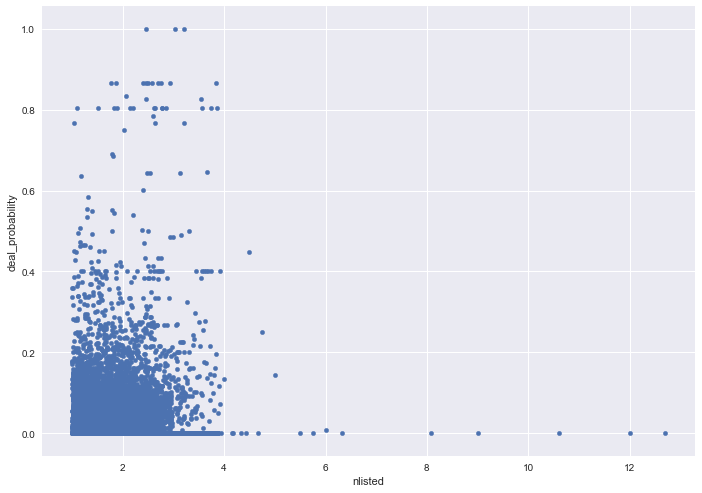

In [102]:
mean_nlisted.plot(kind='scatter', x='nlisted', y='deal_probability');

In [133]:
df_avg_user = df.groupby('user_id').mean()

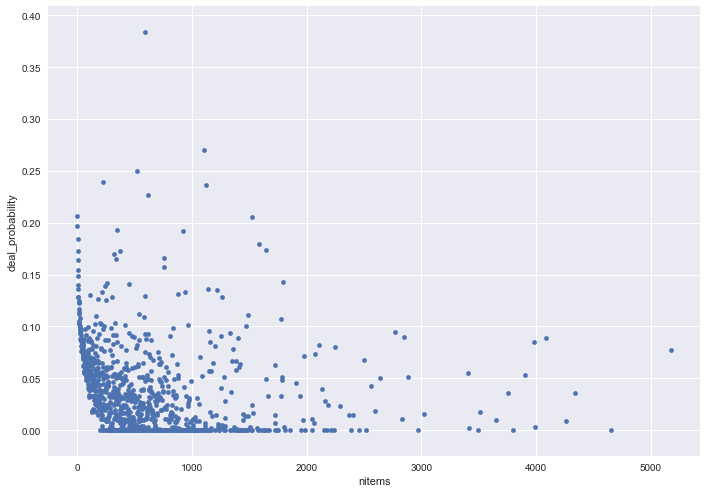

In [129]:
prop = 'nitems'
mean_nitems = df_avg_user[[prop, 'deal_probability']].groupby(prop).mean().reset_index()
# mean_nitems = mean_nitems.apply(round).astype(int)
mean_nitems.plot(kind='scatter', x=prop, y='deal_probability')
# df.plot(kind='scatter', x=prop, y='deal_probability');

In [119]:
df_int=df.copy()
df_int['activation_date_wday'] = df_int['activation_date_wday'].apply(round).astype(int)

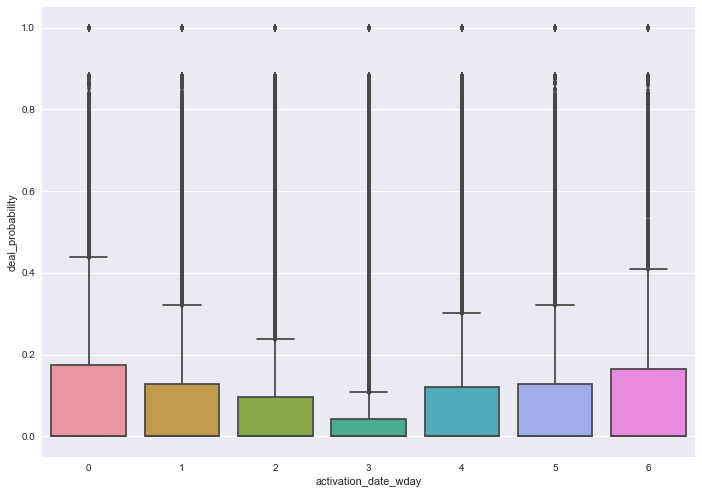

In [123]:
sns.boxplot(x='activation_date_wday', y='deal_probability', data=df_int)

In [137]:
train['activation_wday'] =  train['activation_date'].apply(lambda x: x.dayofweek)

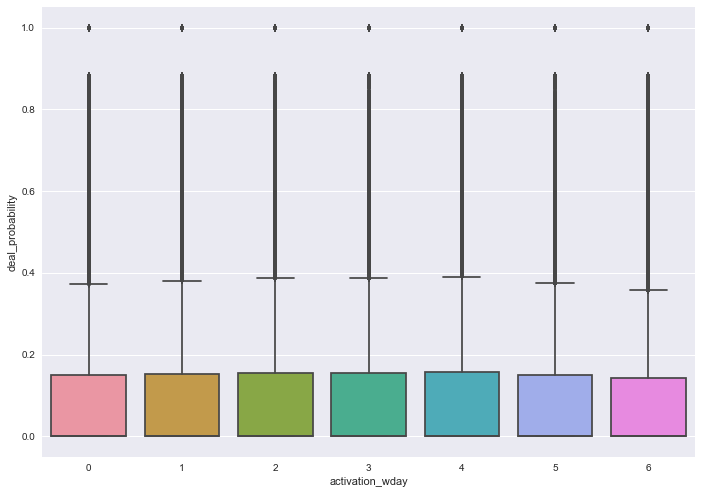

In [138]:
sns.boxplot(x='activation_wday', y='deal_probability', data=train)

/Users/alirezafaghaninia/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


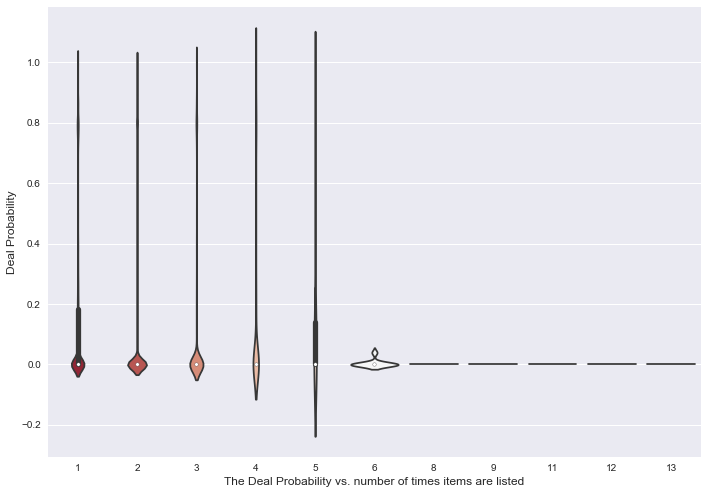

In [26]:
#  Category price box plots
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.violinplot(x='nlisted', y='deal_probability', data=df, palette="RdBu")
g.set_xlabel('The Deal Probability vs. number of times items are listed',fontsize=12)
g.set_ylabel('Deal Probability',fontsize=12)
plt.show()

In [27]:
len(test_active['user_id'].unique())

2920108

In [28]:
len(train_active)

14129821

In [29]:
len(test_active)

12824068

In [30]:
len(train_periods)

16687412

In [31]:
len(test_periods)

13724922